<a href="https://colab.research.google.com/github/YonggunJung/colab/blob/main/KNN_fisharket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [1]:
## 생선분류 문제
# 출처 : https://www.kaggle.com/datasets/aungpyaeap/fish-market

Mounted at /content/drive


In [2]:
#도미
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 빙어
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [4]:
# 2차원 리스트 생성
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

length[0], weight[0]

(25.4, 242.0)

In [5]:
# 리스트 안에 튜플
list(zip(length, weight))

[(25.4, 242.0),
 (26.3, 290.0),
 (26.5, 340.0),
 (29.0, 363.0),
 (29.0, 430.0),
 (29.7, 450.0),
 (29.7, 500.0),
 (30.0, 390.0),
 (30.0, 450.0),
 (30.7, 500.0),
 (31.0, 475.0),
 (31.0, 500.0),
 (31.5, 500.0),
 (32.0, 340.0),
 (32.0, 600.0),
 (32.0, 600.0),
 (33.0, 700.0),
 (33.0, 700.0),
 (33.5, 610.0),
 (33.5, 650.0),
 (34.0, 575.0),
 (34.0, 685.0),
 (34.5, 620.0),
 (35.0, 680.0),
 (35.0, 700.0),
 (35.0, 725.0),
 (35.0, 720.0),
 (36.0, 714.0),
 (36.0, 850.0),
 (37.0, 1000.0),
 (38.5, 920.0),
 (38.5, 955.0),
 (39.5, 925.0),
 (41.0, 975.0),
 (41.0, 950.0),
 (9.8, 6.7),
 (10.5, 7.5),
 (10.6, 7.0),
 (11.0, 9.7),
 (11.2, 9.8),
 (11.3, 8.7),
 (11.8, 10.0),
 (11.8, 9.9),
 (12.0, 9.8),
 (12.2, 12.2),
 (12.4, 13.4),
 (13.0, 12.2),
 (14.3, 19.7),
 (15.0, 19.9)]

In [7]:
# 1차원인데 인덱스가 같은 요소끼리 2차원 리스트 만들기
fish_data = [[l, w] for l, w in zip(length, weight)]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [11]:
X = fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [9]:
len(bream_length), len(smelt_length)

(35, 14)

In [10]:
# 답안 y 데이터 생성
# 도미는 1, 빙어는 0
y = [1]*len(bream_length) + [0]*len(smelt_length)
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [14]:
!pip install KNN

  Preparing metadata (setup.py) ... done
  Created wheel for KNN: filename=KNN-1.0.0-py3-none-any.whl size=3111 sha256=b934074cbf7b95953dcd3c1861449b5dc49f5f965370c3a6b49423843c02f0ee
  Stored in directory: /root/.cache/pip/wheels/db/f0/9c/9da3fdf7ad3d19587a688434d71dbf38ced30bde9fb2975ff7
Successfully built KNN


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error



# 2. KNN모델 생성
knnmodel = KNeighborsClassifier(n_neighbors = 3)
knnmodel.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [19]:
# n_neighbors가 3~27까지 변경될 경우 정확도
for n in range(3, 30, 2):
  print(n, end = '')
  knnmodel = KNeighborsClassifier(n_neighbors = n)
  knnmodel.fit(X, y)
  knnmodel.predict(X)
  print(':', accuracy_score(y, knnmodel.predict(X)))

3: 1.0
5: 1.0
7: 1.0
9: 1.0
11: 1.0
13: 1.0
15: 1.0
17: 1.0
19: 0.9795918367346939
21: 0.9795918367346939
23: 0.9795918367346939
25: 0.9795918367346939
27: 0.9795918367346939
29: 0.7142857142857143


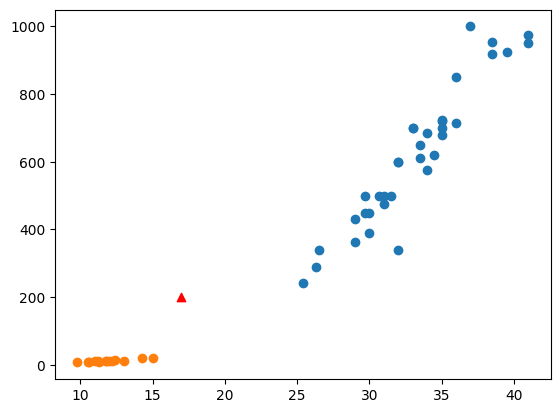

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 빙어와 도미 산점도 그래프
# 길이와 무게를 x, y

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)

# 임의 데이터 입력
plt.scatter(17, 200, marker = '^', color = 'red')